In [3]:
from utils import *

In [4]:
event_0to999 = importpdrange(0, 999)
event_20 = importpbdatapandas(20)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9
importing event  10
importing event  11
importing event  12
importing event  13
importing event  14
importing event  15
importing event  16
importing event  17
importing event  18
importing event  19
importing event  20
importing event  21
importing event  22
importing event  23
importing event  24
importing event  25
importing event  26
importing event  27
importing event  28
importing event  29
importing event  30
importing event  31
importing event  32
importing event  33
importing event  34
importing event  35
importing event  36
importing event  37
importing event  38
importing event  39
importing event  40
importing event  41
importing event  42
importing event  43
importing event  44
importing event  45
importing event  46
importing event  47
importing event  48
importing event  49
importing event  50
importing

In [4]:
# # 3d surface plot the data
# from mpl_toolkits import mplot3d

# phi = event_0to999['phi']
# eta = event_0to999['eta']

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(phi, eta, s)
# plt.show()

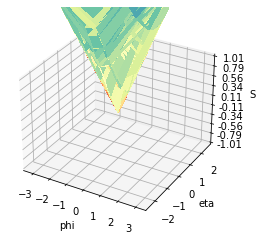

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_20['phi']
Y = event_20['eta']
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2+Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')

# Add a color bar which maps values to colors.

plt.show()

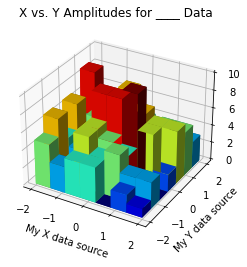

In [6]:
# To generate some test data
x = event_20['phi']
y = event_20['eta']

XY = np.stack((x,y),axis=-1)

def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

XY_select = selection(XY, limitXY=[[-2,+2],[-2,+2]])


xAmplitudes = np.array(XY_select)[:,0]#your data here
yAmplitudes = np.array(XY_select)[:,1]#your other data here


fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(7,7), range = [[-2,+2],[-2,+2]]) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.show()

/var/folders/q6/30jjmbqn0gn55mvg8gm200nh0000gn/T/ipykernel_8295/3846509424.py:11: UserWarning: Attempting to set identical bottom == top == 2 results in singular transformations; automatically expanding.
  plt.imshow(z, interpolation='nearest', cmap=plt.cm.viridis, extent=[-2,2,2,2])


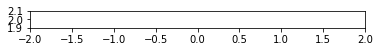

/var/folders/q6/30jjmbqn0gn55mvg8gm200nh0000gn/T/ipykernel_8295/3846509424.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


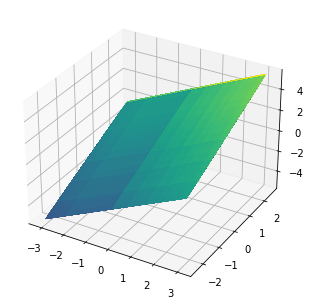

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = event_20['phi']
y = event_20['eta']

xx, yy = np.meshgrid(x, y)

z = xx+yy

plt.imshow(z, interpolation='nearest', cmap=plt.cm.viridis, extent=[-2,2,2,2])
plt.show()

from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())

ax.plot_surface(xx, yy, z, cmap=plt.cm.viridis, cstride=1, rstride=1)
plt.show()

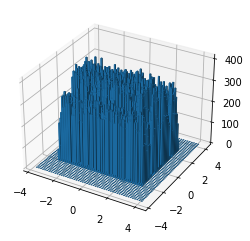

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
x = event_0to999['phi']
y = event_0to999['eta']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=50, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [ ]:
def surfacedata(dfdata, dphi = 0.5, deta = 0.05, rangex=4, rangey=4):
    phi_c = math.ceil(rangex*2/dphi)-1
    eta_c = math.ceil(rangey*2/deta)-1
    phi_data = np.arange(-rangex, rangex, dphi)+dphi/2
    eta_data = np.arange(-rangey, rangey, deta)+deta/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for instance in dfdata:
        if instance['phi'] > rangex or instance['phi'] < -rangex or instance['eta'] > rangey or instance['eta'] < -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dphi)
        eta_index = math.floor((instance['eta']+rangey)/deta)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data


# ax.set_xlabel('phi')
# ax.set_ylabel('eta')

In [12]:
import math
dp =0.5
rax = 4
aaax = np.arange(-rax, rax, dp)
print(aaax)
pc=math.ceil(rax*2/dp)-1
print(pc)
phi_d = np.arange(-rax, rax, dp)+dp/2
print(phi_d)

[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5]
15
[-3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75
  2.25  2.75  3.25  3.75]
